<a href="https://colab.research.google.com/github/pramod225/Artificial-intelligence/blob/master/studentperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering on students Performance data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
stud=pd.read_csv('StudentsPerformance.csv')

In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
stud.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
stud.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
stud.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
stud.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


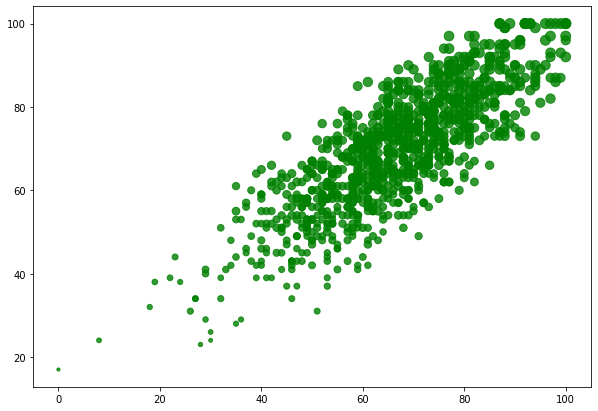

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(stud["math score"],stud["reading score"],stud["writing score"],color='green',alpha=0.8)



In [0]:
st=stud.iloc[:,[5,6,7]]


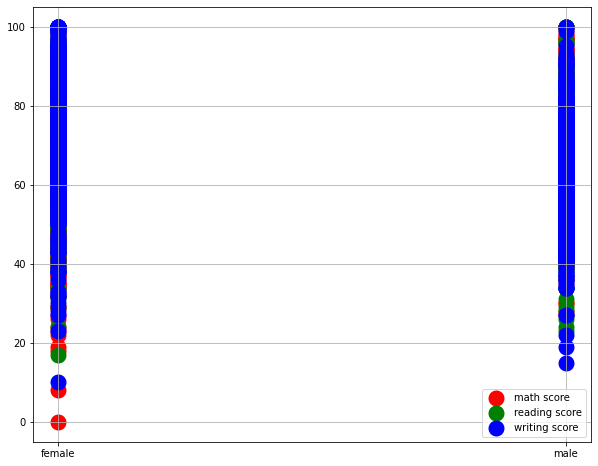

In [10]:
plt.figure(figsize=(10,8))
plt.grid()
plt.scatter(stud.gender,stud['math score'],color='r',label="math score",linewidths=10)
plt.scatter(stud.gender, stud['reading score'],color='g',label="reading score",linewidths=10)
plt.scatter(stud.gender, stud['writing score'],color='b',label="writing score",linewidths=10)
plt.legend()

Text(0.5, 0.98, 'checking score')

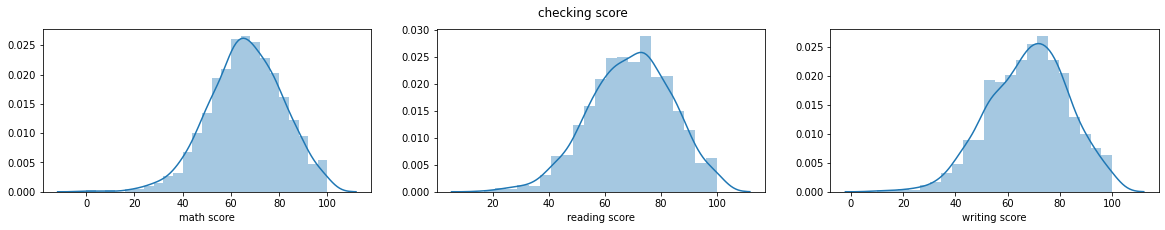

In [11]:
plt.figure(figsize=(20,3))
plt.subplot(1,3,1)
sns.distplot(stud["math score"])
plt.subplot(1,3,2)
sns.distplot(stud["reading score"])
plt.subplot(1,3,3)
sns.distplot(stud["writing score"])
plt.suptitle('checking score')

# Scalling and transfroming data

In [12]:
scaler=MinMaxScaler()
scaler.fit(stud[['math score']])
stud['math score']=scaler.transform(stud[['math score']])

scaler.fit(stud[['reading score']])
stud['reading score']=scaler.transform(stud[['reading score']])

scaler.fit(stud[['writing score']])
stud['writing score']=scaler.transform(stud[['writing score']])

stud.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,0.76,0.734940,0.722222


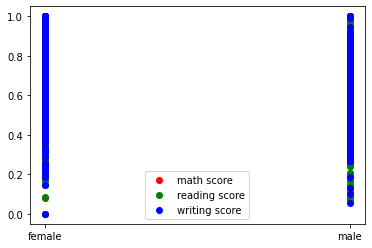

In [13]:
plt.scatter(stud.gender,stud['math score'],color='r',label='math score')
plt.scatter(stud.gender,stud['reading score'],color='g',label='reading score')
plt.scatter(stud.gender,stud['writing score'],color='b',label='writing score')
plt.legend()

# K-Means

In [14]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(st)
y_pred

array([0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,

In [15]:
st['cluster']=y_pred
stud.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,0.76,0.734940,0.722222


In [16]:
km.cluster_centers_

array([[65.19772727, 68.32727273, 67.69545455],
       [81.66134185, 84.98083067, 84.02555911],
       [47.94331984, 50.63157895, 48.4534413 ]])

In [0]:
stud1=st[st.cluster==0]
stud2=st[st.cluster==1]
stud3=st[st.cluster==2]

Text(0, 0.5, 'students score')

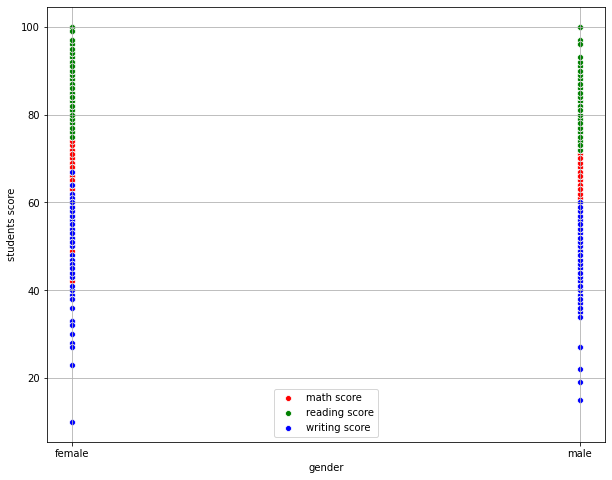

In [18]:
plt.figure(figsize=(10,8))
plt.grid()
sns.scatterplot(stud.gender,stud1["math score"],color='red',label="math score")
sns.scatterplot(stud.gender,stud2["reading score"],color='green',label="reading score")
sns.scatterplot(stud.gender,stud3["writing score"],color='blue',label="writing score")
plt.legend()
plt.xlabel("gender")
plt.ylabel("students score")


#Apply Elbow method

In [0]:
k_rng=range(1,10)
ks=[]
for i in k_rng:
  km=KMeans(n_clusters=i)
  km.fit(stud[['math score','reading score','writing score']])
  ks.append(km.inertia_)


In [20]:
ks

[82.35951248838478,
 33.98098319397144,
 21.15867512139188,
 16.062574013472577,
 12.939259454093385,
 11.295210668223413,
 10.067029598211448,
 9.122796930395745,
 8.140730056170309]

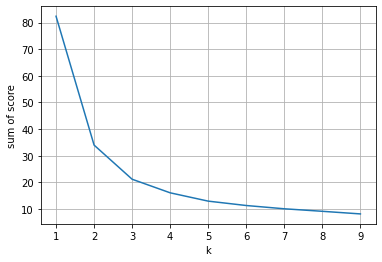

In [21]:
plt.grid()
plt.xlabel('k')
plt.ylabel('sum of score')
plt.plot(k_rng,ks)

#Hierarchical clustering

In [22]:
st=stud.iloc[:,[5,6,7]].values
st


array([[0.72      , 0.6626506 , 0.71111111],
       [0.69      , 0.87951807, 0.86666667],
       [0.9       , 0.93975904, 0.92222222],
       ...,
       [0.59      , 0.65060241, 0.61111111],
       [0.68      , 0.73493976, 0.74444444],
       [0.77      , 0.8313253 , 0.84444444]])

Text(0, 0.5, 'Euclidean distances')

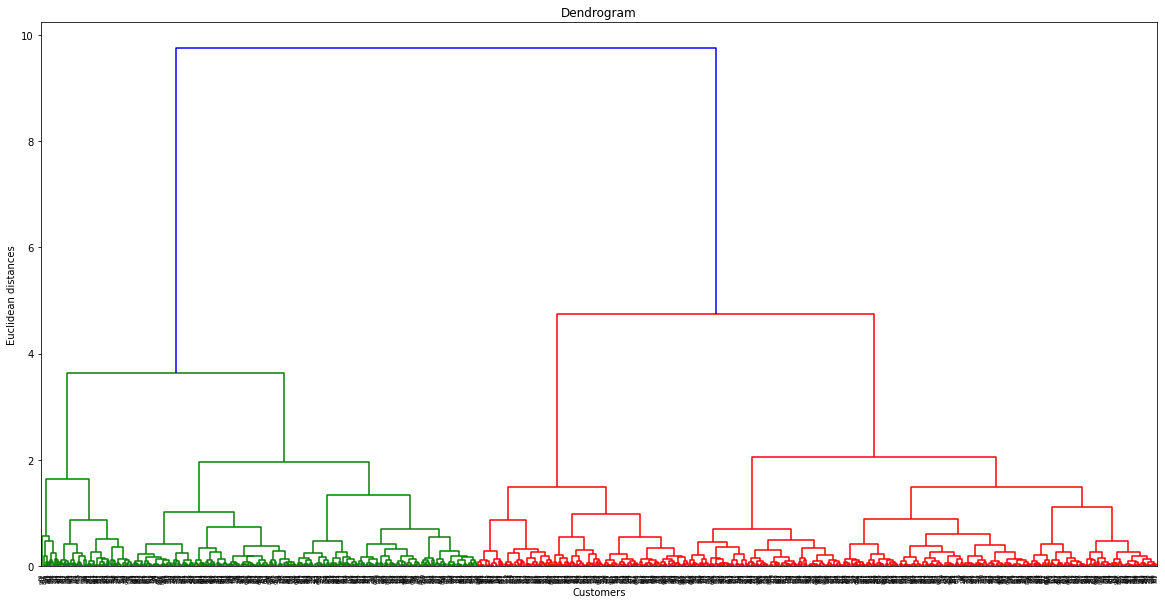

In [23]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(st, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [0]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='complete')

In [0]:
h_pred=hc.fit_predict(st)

In [26]:
h_pred

array([0, 0, 0, 3, 0, 0, 0, 4, 1, 3, 3, 3, 0, 0, 3, 0, 0, 2, 4, 1, 1, 1,
       3, 1, 0, 0, 3, 1, 1, 1, 1, 1, 1, 4, 0, 0, 0, 1, 0, 3, 3, 1, 1, 1,
       3, 3, 1, 1, 1, 0, 3, 1, 4, 0, 0, 4, 0, 3, 3, 2, 0, 4, 3, 0, 3, 1,
       4, 1, 3, 1, 1, 3, 3, 3, 4, 4, 2, 0, 1, 1, 3, 4, 3, 1, 4, 0, 0, 0,
       1, 0, 1, 2, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 1, 1, 1,
       0, 3, 3, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 1, 0, 3, 0, 4,
       0, 0, 0, 3, 3, 3, 1, 1, 0, 1, 3, 4, 0, 2, 0, 1, 0, 0, 1, 1, 1, 3,
       1, 0, 1, 1, 0, 1, 0, 0, 3, 3, 0, 0, 3, 1, 0, 1, 0, 0, 0, 1, 3, 0,
       3, 0, 1, 0, 1, 1, 3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 1, 1, 0, 3, 1, 3,
       3, 0, 0, 0, 1, 1, 4, 0, 1, 0, 0, 1, 0, 2, 1, 3, 0, 0, 0, 4, 1, 3,
       1, 0, 1, 0, 1, 3, 0, 3, 1, 0, 1, 4, 0, 0, 0, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 1, 0, 0, 1, 1, 1, 3, 0, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 3, 0,
       1, 4, 0, 1, 0, 1, 1, 3, 3, 1, 0, 0, 0, 1, 0, 1, 3, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 4, 1, 3, 0, 0,

Text(0, 0.5, 'Scoring ')

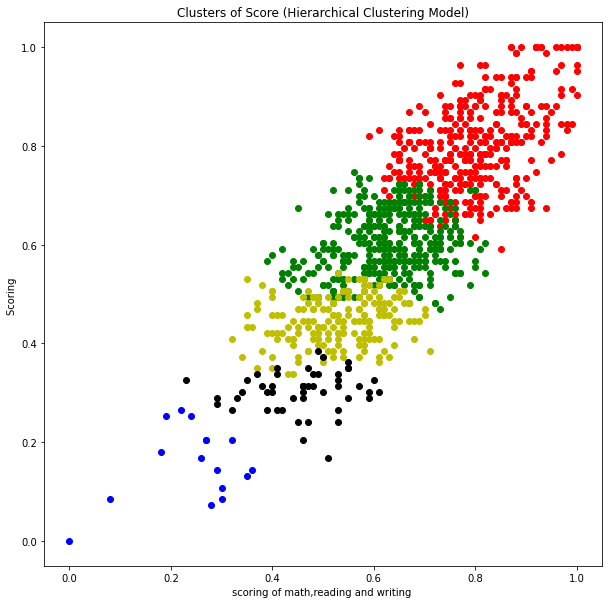

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(st[h_pred==0,0], st[h_pred==0,1],c='r', label ='Cluster 1')
plt.scatter(st[h_pred==1,0], st[h_pred==1,1],c='g', label ='Cluster 2')
plt.scatter(st[h_pred==2,0], st[h_pred==2,1],c='b', label ='Cluster 3')
plt.scatter(st[h_pred==3,0], st[h_pred==3,1], c='y', label ='Cluster 4')
plt.scatter(st[h_pred==4,0], st[h_pred==4,1], c='black', label ='Cluster 5')
plt.title('Clusters of Score (Hierarchical Clustering Model)')
plt.xlabel('scoring of math,reading and writing ')
plt.ylabel('Scoring ')



# DBSCAN 

In [0]:
dbscan = DBSCAN(eps=0.25, metric='euclidean', min_samples=63)

In [29]:
dbscan.fit(st)

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=63, n_jobs=None, p=None)

In [30]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [31]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(st)
pca_2d = pca.transform(st)
pca_2d

array([[-0.09037349,  0.01513759],
       [-0.30475474, -0.14030591],
       [-0.48026177,  0.00105393],
       ...,
       [ 0.04172774, -0.05578921],
       [-0.1358246 , -0.05567358],
       [-0.3009729 , -0.04688021]])

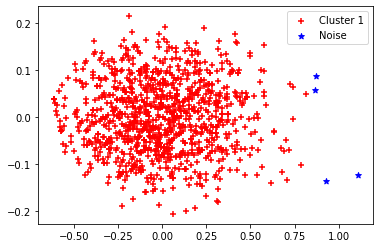

In [32]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])
    

In [33]:
stud.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,0.76,0.734940,0.722222


Text(0.5, 1.0, 'Gender vs Race')

<Figure size 1440x720 with 0 Axes>

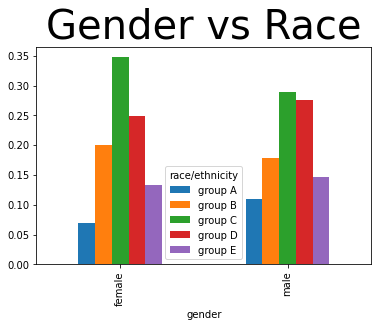

In [48]:
plt.figure(figsize = (20,10))
x = pd.crosstab(stud['gender'], stud['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Gender vs Race', fontweight = 30, fontsize = 40)

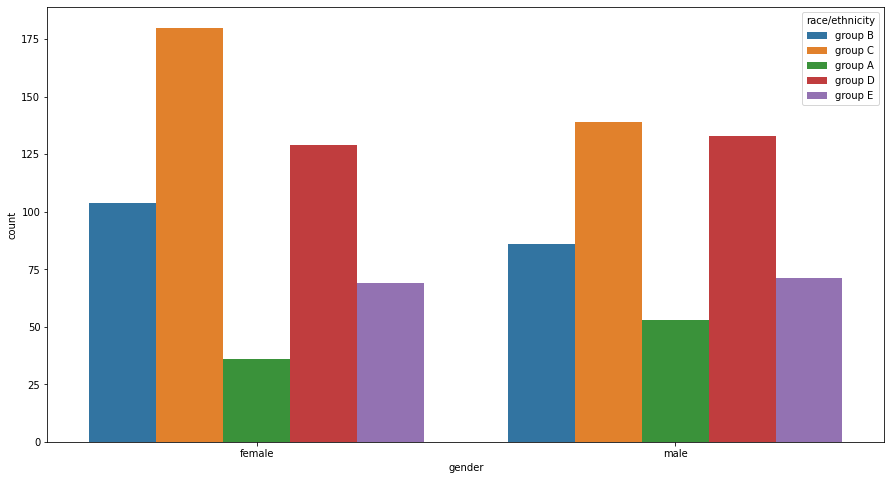

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(stud['gender'],hue=stud['race/ethnicity'])

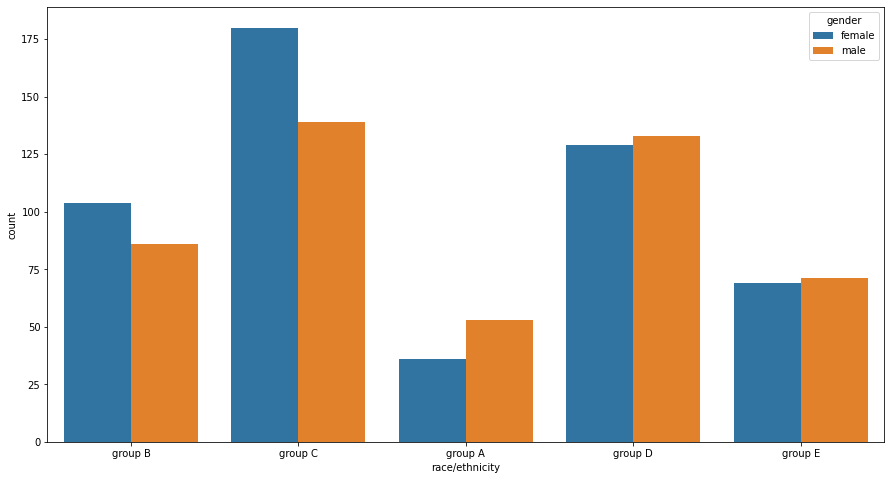

In [43]:
plt.figure(figsize=(15,8))
sns.countplot(stud['race/ethnicity'],hue=stud['gender'])